## <center>Assignment_3</center>
<center>Gauthami
Kuravi</center>



<ol>
  <li> Using the high utilization data, optimize hyperparameters for Random Forest, Logistic Regression, and another selected learning method. For each of the method, search through values of at least three different hyperparameters</li>
  
  <li> Plot model AUC and accuracy on training and testing data for different values of lambda (C) in L1 regularized logistic regression. </li>
    
    Report your results by comparing them to execution of the methods to the default values.
</ol>



In [1]:
import os
os.getcwd()
os.chdir(r'C:\Users\skura\Desktop\Classes\Spring_Semester_1\Adv Data Mining')

### importing all required libraries

In [3]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc
from sklearn.metrics import roc_curve



# Reading File
df = pd.read_csv(r'highUtilizationPredictionV2wco.csv')
#df

print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

Number of instances = 113024
Number of attributes = 68


### Data Preprocessing

In [4]:

Process = {'size': df.size, 'columns': df.columns , 'Index' : len(df.index), 'Null_Count': df.isnull().sum(),'Describe' : df.describe}
for k,v in Process.items():
        print(str(k)+': '  + str(v))

size: 7685632
columns: Index(['race', 'age', 'patient_id', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4',
       'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11',
       'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18',
       'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25',
       'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5',
       'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14',
       'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23',
       'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5',
       'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10',
       'drugs_m10-11', 'drugs_m11-12', 'HighUtilizationY2', 'claimCount'],
      dtype='object')
Index: 113024
Null_Count: race                 0
age                  0
patient_id           0
ELIX1                0
ELIX2                0
ELIX3                0
ELIX4                0
ELIX5      

In [10]:
for c in df.columns:
     print(df[c].value_counts())

W       90970
B        8446
A        5804
O        3615
H        3245
U         502
Am.N      442
Name: race, dtype: int64
68    6695
69    6533
67    6255
66    5929
70    5858
90    5788
71    5510
72    5419
73    5284
65    5239
74    5176
75    4987
76    4598
77    4414
79    3992
78    3952
81    3726
80    3662
82    3338
83    3092
84    2927
85    2619
86    2304
87    2177
88    1889
89    1661
Name: age, dtype: int64
PAT152100    1
PAT169187    1
PAT148178    1
PAT120048    1
PAT13863     1
PAT115356    1
PAT168509    1
PAT100942    1
PAT30795     1
PAT68220     1
PAT146813    1
PAT99821     1
PAT52627     1
PAT154592    1
PAT115773    1
PAT29787     1
PAT31585     1
PAT157532    1
PAT199965    1
PAT194478    1
PAT40392     1
PAT179707    1
PAT199194    1
PAT156637    1
PAT101491    1
PAT60199     1
PAT200887    1
PAT180761    1
PAT176326    1
PAT148068    1
            ..
PAT183101    1
PAT93695     1
PAT126694    1
PAT82091     1
PAT183767    1
PAT187442    1
PAT64318    

In [5]:
# Removing unwanted columns
variables = df.columns.tolist()
variables.remove('race')
variables.remove('patient_id')
variables.remove('HighUtilizationY2')
variables.remove('claimCount')
df[variables]

,age,ELIX1,ELIX2,ELIX3,ELIX4,ELIX5,ELIX6,ELIX7,ELIX8,ELIX9,...,drugs_m2-3,drugs_m3-4,drugs_m4-5,drugs_m5-6,drugs_m6-7,drugs_m7-8,drugs_m8-9,drugs_m9-10,drugs_m10-11,drugs_m11-12
0,71,0,0,0,0,0,1,0,1,1,...,3,3,0,1,4,2,1,3,1,1
1,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,70,1,0,0,0,0,0,0,0,1,...,1,3,4,2,2,0,6,2,1,0
3,75,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,77,0,0,0,0,1,0,0,1,1,...,2,2,4,3,4,4,4,3,4,4
5,86,0,0,0,0,0,0,0,0,1,...,1,0,1,1,0,0,0,0,1,0
6,84,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,78,0,0,0,0,0,0,0,0,0,...,3,0,1,3,0,4,0,4,0,1
8,73,0,0,0,0,0,0,0,0,1,...,2,7,1,3,0,0,2,1,1,2
9,90,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the data in Train and Test

In [6]:
size = df.index.size
#113024

train = df[:int(size*0.8)]
test = df[int(size*0.8):]
train=train.fillna(0)
test=test.fillna(0)

### SelectingInput/Output Variables

In [28]:
X_train=train[variables]
Y_train=train['HighUtilizationY2']
X_test=test[variables]
Y_test=test['HighUtilizationY2']
def classify(model,X,Y):
    model.fit(X,Y)    
    probs=model.predict_proba(X)[:,1]
    return probs;

### Logistic Regression

In [29]:
lr = LogisticRegression()

probtr = classify(lr,X_train,Y_train)

probts = lr.predict_proba(X_test)[:,1]


C:\Users\skura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


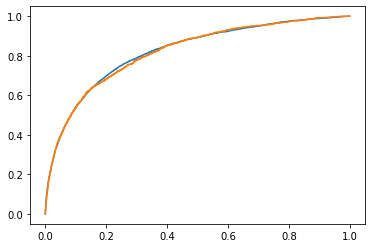

In [31]:
fpr, tpr, thresholds = roc_curve(Y_train, probtr)
auc(fpr,tpr)

#0.82238

fpr1, tpr1, thresholds1 = roc_curve(Y_test, probts)
auc(fpr1,tpr1)

#0.8200

get_ipython().magic('matplotlib inline')
from matplotlib import pyplot as plt
plt.plot(fpr,tpr)
plt.plot(fpr1, tpr1) # plotting  test separately  
plt.show()

## Random Forest Classifier

In [50]:
rf = RandomForestClassifier(n_estimators=100)

rf_probtr = classify(rf,X_train,Y_train)
rf_probts = rf.predict_proba(X_test)[:,1]


In [49]:
rf_fpr, rf_tpr, thresholds = roc_curve(Y_train, rf_probtr)
auc(rf_fpr,rf_tpr)
#0.9987625574005403
rf_fpr1,rf_tpr1, thresholds1 = roc_curve(Y_test,rf_probts)
auc(rf_fpr1,rf_tpr1)
#0.7967435568585016

0.7967435568585016

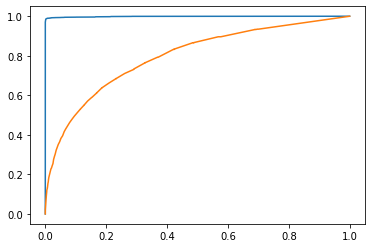

In [44]:
get_ipython().magic('matplotlib inline')
from matplotlib import pyplot as plt
plt.plot(rf_fpr,rf_tpr)
plt.plot(rf_fpr1,rf_tpr1) # plotting  test separately  
plt.show()

## Test Performance on both Logistic and Random Models

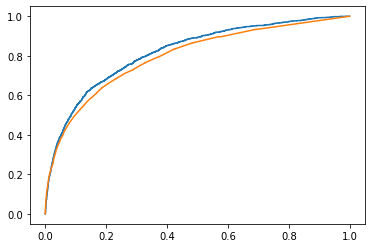

In [45]:
get_ipython().magic('matplotlib inline')
from matplotlib import pyplot as plt
plt.plot(fpr1,tpr1)
plt.plot(rf_fpr1,rf_tpr1) # plotting  test separately  
plt.show()